## Fully connected layers (capas totalmente conectadas o densas)
La conexion es todas con todas, como en la figura de la clase 18.
El numero de parametros es el mas grande posible.

$$\text{# parametros de entrenamiento} = (n_i + 1) \times n_o .$$

Para llegar a la capa de donde se conectan todos con todos, se puede hacer

* "flatten" (en ```python```), o , la salida es
$1 \times 1 \times (\times n_x \times  n_y \times n_z) $.
* convolucion con un filtro de tamano $nx \times ny \times 1$,
donde $nx \times ny$ es el tamano en $x,y$ de los datos de entrada. La salida es del tamano $1 \times 1 \times n_z$.
No explico cuanto es $n_z$

In [3]:
import numpy as np
a = np.array([[1,2], [3,4]])
print(a)
print(a.flatten())

[[1 2]
 [3 4]]
[1 2 3 4]


# Campo receptivo.
Antes de ver ejemplos de redes reales neuronales, veamos lo que significa el "receptive field".

El campo receptivo es la "apertura" requerida para iluminar una sola neurona (esto lo explico). La idea es que tanto de los datos de entrada tienen efecto en una neurona. He visto en los espejos de los carros un aviso: "si usted no me va a mi, yo no veo a usted". Si una red neuronal esta "fully connected", el campo receptivo es toda la capa de entrada.

Esto se entiende mejor con ejemplos.

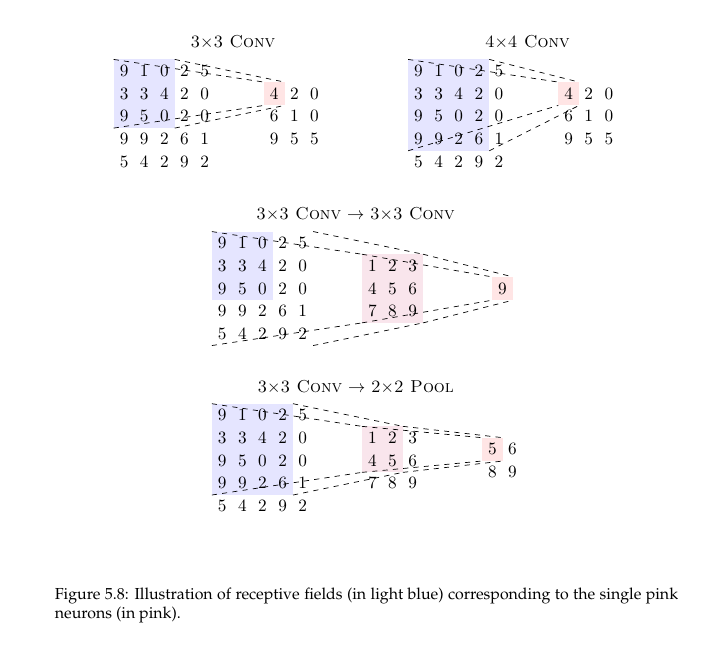

Explico la figura de arriba.

* El 4 rosadito de la parte superior izquierda resulto de los
datos

$$\begin{pmatrix} 9 & 1 & 0 \\ 3 & 3 & 4 \\ 9 & 5 & 0 \end{pmatrix} .$$

* los demas ejemplos fueron explicados solo verbalmente.

Algunos enlaces importantes.

* En general esta pagina.
[receptive field wikipedia](https://en.wikipedia.org/wiki/Receptive_field) es ilustrativa desde el punto de vista biologico de la vision.

* [Pagina ilustrativa acerca del campo receptivo](https://theaisummer.com/receptive-field/)


* [Articulo donde se muestra que la distribucion de la contribucion es gaussiana](https://arxiv.org/pdf/1701.04128.pdf)

Un poquito de matematicas.
Vamos a asumir una red convolucional con filtro (unidimensional)
de tamano $k$ y  $n$ capas. El tamano de la entrada es $x$. Pregunta, cual es el tamano del campo receptivo?
Se asume no padding, no strides. $s=1$.

\begin{eqnarray}
\text{input:} && x  \\
\text{capa 1:} && x - k  + 1 \\
\text{capa 2:} && x - k  + 1 -k + 1 = x - 2k + 2\\
 &\vdots& \\
 \text{capa n:} && x - nk + n.
\end{eqnarray}
La pregunta es cuanto vale $x$. La respuesta viene de que

$$ x- nk + n = 1 .$$
Debemos despejar $x$

$$x = nk - n + 1 = n(k-1) + 1  .$$






Por ultimo, antes de pasar a ejemplos concretos hablemos de regularizacion.


# Regularizacion:
La regularizacion es importante no solo por que cuando los problemas son inestables ayuda a estabilizarlos sino por que ayuda a evitar el sobreajuste (overfitting).

Por ejemplo en el caso de la regresion lineal, donde se pretende resolver $Ax = b$, podemos usar la extension de este problema a

$$(A^T A  + \lambda I) x = A^T b \quad \lambda > 0 .$$

Hablemos del problema de "overfitting". El "overfitting" ajusta el modelo demasiado bien a los datos, al punto de que puede emular ruido o seguir el ruido con mucho detalle y danha la generalizacion. Generalizacion quiere decir que el modelo se ajusta a datos nuevos (que nunca a visto).

Yo voy a incluir un ejemplo del overfitting y como la regularizacion funciona bien para evitarlo.




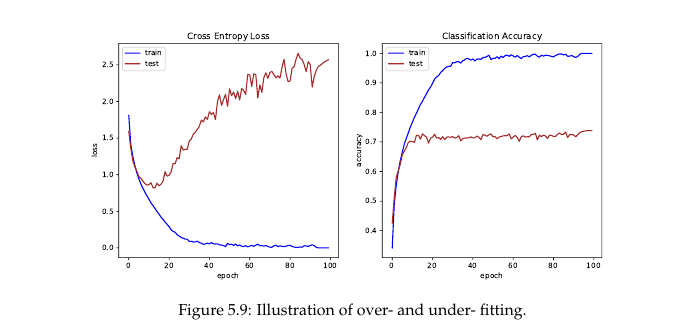

La grafica de arriba corresponde a un experimento con una red neuronal VGGNet (la veremos muy pronto, posiblemente en 2 semanas) sobre imagnes del
[cifar-10](https://www.cs.toronto.edu/~kriz/cifar.html).

Como evitamos el overfitting?

* Una forma puede ser incrementando los datos. Piense que un algoritmo esta disenhado para reconocer caras y se entrena con caras solamente. Si usted le mete una persona de pie, foto completa, probablemente va a fallar. Agregue mas datos, agrege personas de pie y tambien sentadas. Recuerde que este tema lo estudiamos y mostramos muchos sitios donde se pueden adquirir datos (en la web). Ejemplos CIFAR-10, CIFAR-100, MNIST lo vamos a usar pronto (tanto en este curso como en el curso de ML), del Flower Data Set, etc.

* Si, por alguna razon, no podemos encontrar en la web mas datos apropiados para nuestro experimento podemos **aumentarlos**.
Los datos se pueden rotar, estirar.
```Python``` tiene librerias (modulos) muy importantes para **aumentar** los datos: ```NumPy```, the  ```Python Image Library``` (PIL)
[Pillow](https://pillow.readthedocs.io/en/stable/) Pillow es una inteface para PIL


* Otra forma de evitar el "overfitting" es reduciendo parametros.
Una forma de reducir parametros es mediante el "dropout" (lo explico en un minuto).

* Recuerde que otra forma de regularizar (esto reduce el "overfitting") es usando funciones objetivo con penalty.

Por ejemplo, para una funcion de costo $C(\theta)$ dada,
odemos escoger dos funciones de pentalty.

\begin{eqnarray}
J_1 (\theta) = C(\theta) + \lambda \| \theta \|^2 \\
J_2 (\theta) = C(\theta) + \lambda \| \theta \|_1^2 \\
\end{eqnarray}
donde $\| . \|_1$  es la suma de los valores absolutos de los $\theta_{i}$.  

* Otra forma de reducir el "overfitting" es **early stopping**.
Parar a tiempo. Veamos la grafica de arriba, si para en la epoca 5, aunque no sea optimo el resultado, es mucho mejor que seguir adelante.


* La ultima tecnica para despedir la clase de hoy es el **dropout**.

## Dropout:
Esta tecnica fue introducida por Geoffrey Hinton y colegas en la universidad de Toronto.  La idea es eliminar nodos de la red, aleatoriamente junto con las conexiones.




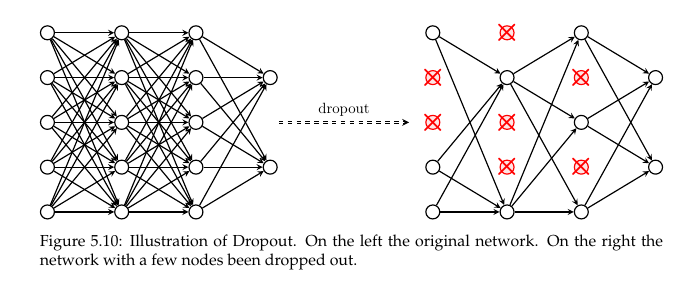

Se usa un parametro que es entre 0 y 1. 0 no hace nada, 1 elimina toda la capa (no se usan) pero este parametro esta en general en intervalo [0.25, 0.75].
Veamos que pasa en el ejemplo de ls VGGNet cuando usamos dropout.

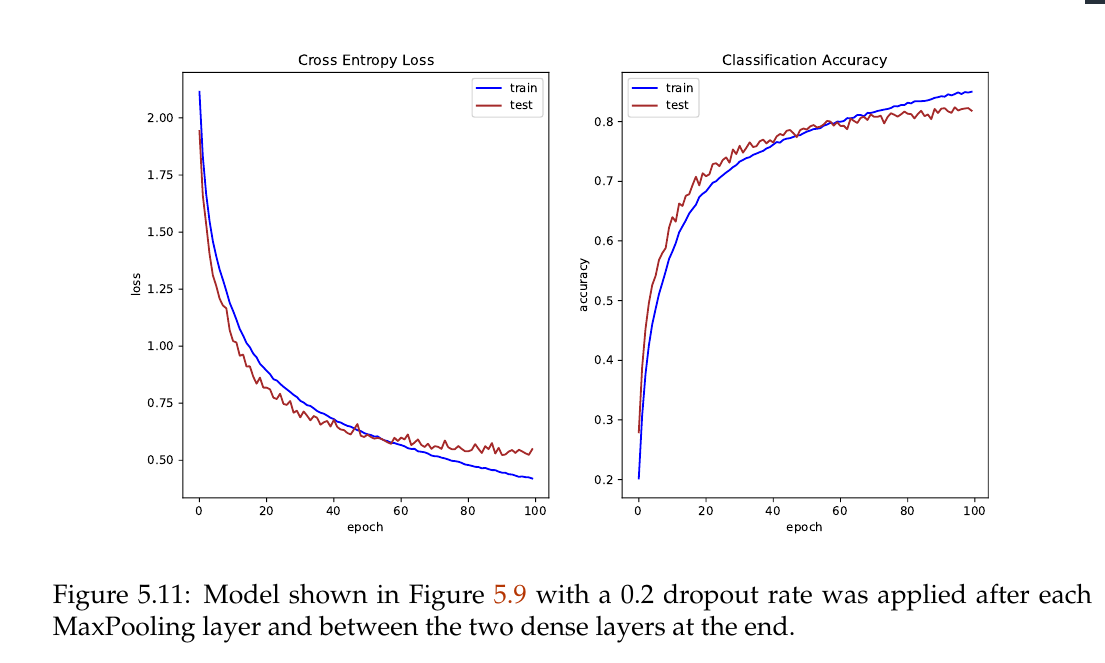

## Batch Normalizacion.
Es normalizacion de cada capa. Recuerde la normalizacion en ML.
Por ejemplo la normalizacion estandard. Divide y resta en cada nodo para que la salida tenga media 0 y desviacion estandard 1.

# Proxima clase:  Arquitecturas populares para CNN.